# ETUDE DYNAMYQUE DES METROS DE PARIS

## Introduction

Nous allons faire une étude sur le nombre de personne qui attentte a chaque métros.

parametre

* nb de personne                                                                              nb
* personne qui habite (en temps (0 jamais perssonne 1 trop tous le temps des personne arrive) ar
* perssonne qui sort de la gare entre 0 et 1                                                  so
* temps d'arriver du metro                                                                    ta
* capacité du metro                                                                           cm
* temps de la journée                                                                         tj



parramettre plus tard
* temps pour une perssonne a rentré / sortir

### Les importation

In [199]:
%matplotlib inline



from pylab import *


import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [200]:
#ligne;nom;niem_arret;
ar = 0
so = 0
ta = 2
cm = 0.5
#tj = compteur

#def update():
    

# initialisation
on va commencer par deux gare relier entre elles.  
hypothèse :  
 * deplacement wagon instantané

In [201]:
class Station:
    def __init__(self, ar, so, ta, cm):
        self.ar = ar # % d'arrivant dans la gare
        self.so = so # % de partant dans la gare
        self.ta = ta # temps entre chaque metro
        self.cm = cm # capacité d'un metro
        self.nb = 0 # nombre de personne dans le metro
        self.t = 0   # initialisatien du temps de la gare
        self.next_s = self
    
    
    def update(self): # fonction qui actualise les donnés
        if self.so >= np.random.choice(100):
            n = np.random.choice(10)
            if self.nb - n >= 0:
                self.nb = self.nb - n
            else:
                self.nb = 0
        if self.ar >= np.random.choice(100):
            self.nb += np.random.choice(10)
        self.t += 1
        if self.t > ta:
            if self.nb >= self.cm:
                self.next_s.nb += self.cm
                self.nb = self.nb - self.cm
            else:
                self.next_s.nb += self.nb
                self.nb = 0
            self.t=0
                
    
    def next_station(self, station):
        self.next_s = station

In [202]:
nb_step = 24*3600

cm = 700

ar1 = 50
so1 = 20
ta1 = 1

ar2 = 2
so2 = 100
ta2 = 5*60

List_Gare = []
List_Gare.append(Station(ar1, so1, ta1, cm))
List_Gare.append(Station(ar2, so2, ta2, cm))
List_Gare[0].next_station(List_Gare[1])
List_Gare[1].next_station(List_Gare[0])

In [203]:
def simulation(L):
    time = [] # liste qui represente le temps 
    nb_tot = []
    for i in range(nb_step):
        nb = 0
        time.append(i)
        for j in L:
            j.update()
        for j in L:
            nb += j.nb
        nb_tot.append(nb)
    #fig, axes = plt.subplots(nrows=1, ncols=2)
    #axes[0].plot(time, nb_tot, 'b')
    figure()
    plot(time, nb_tot, 'b')


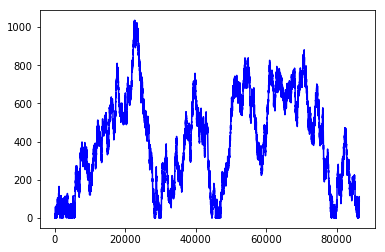

In [204]:
simulation(List_Gare)
